## Frequency-Wavenumber analysis of DAS data

In [1]:
import matplotlib.pyplot as plt
from dasquakes import *
import pandas as pd
import os
# import sys
# !{sys.executable} -m pip install tqdm
from tqdm import tqdm
from scipy.signal import butter, filtfilt
import h5py
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal import detrend, tukey
import matplotlib.pyplot as plt
import h5py
import numpy as np

In [2]:
calibration = pd.read_csv('calibration.csv')
fiberroute = pd.read_csv('fiberroute.csv')

## Data parameters

In [3]:
cable='seadasn'
record_length = 10 #minutes
t0 = datetime.datetime(2022, 5, 15, 0, 0, 0)

In [4]:
prefix, network_name, datastore = data_wrangler(cable,record_length,t0)

data,dates,attrs = open_sintela_file(prefix,
                                     t0,
                                     datastore,
                                     number_of_files=record_length,
                                     verbose=False)

# channel_range = [0,1000]
# data = data[:, channel_range[0]:channel_range[1]]

In [5]:
attrs

{'AcquisitionId': b'c2e024cf-2460-46aa-a3b2-39c439ca0eea',
 'Build': b'release-5.17:9_P',
 'Classification': b'TestClass',
 'Comment': b'TestComment',
 'CommitHash': b'f9dcdb09c',
 'Creator': b'TestAuthor',
 'DasInstrumentBox': b'ONYX',
 'DetectionAccuracy': b'Incorrect Classification',
 'FFID': 0,
 'FacilityId': b'ONYX-0203 Fiber 1',
 'FiberID': 0,
 'GaugeLength': 6.38095235824585,
 'GaugeLengthUnit': b'm',
 'Hostname': b'ONYX-0203',
 'MaximumFrequency': 50.0,
 'MeasurementStartTime': b'2022-05-14T23:59:59.998500+00:00',
 'MinimumFrequency': 0.0,
 'NumberOfLoci': 1750,
 'OpticalPath': b'OpticalPath',
 'PulseRate': 100.0,
 'PulseRateUnit': b'Hz',
 'PulseWidth': 20.0,
 'PulseWidthUnit': b'ns',
 'SoftwareVersion': b'9',
 'SpatialSamplingInterval': 6.38095235824585,
 'SpatialSamplingIntervalUnit': b'm',
 'StartLocusIndex': 0,
 'SystemType': b'Xavier',
 'TriggeredMeasurement': 0,
 'VendorCode': b'Sintela',
 'schemaVersion': b'2.0',
 'uuid': b'59eab7e4-feba-4ce2-b4f3-9ff7f8320778'}

## Acquisition parameters

In [6]:
nt = data.shape[0]
nx = data.shape[1]
print(f'Number of time steps: {nt}, Number of channels: {nx}')

print (f"Nyquist Frequency: {attrs['MaximumFrequency']} Hz, cable length: {attrs['SpatialSamplingInterval']*nx} m")

Number of time steps: 60000, Number of channels: 1749
Nyquist Frequency: 50.0 Hz, cable length: 11160.285674571991 m


## Buzzing in overhead lines:

In [7]:
filename = '/data/data7/seadasn_2022-06-21_2022-10-06/seadasn_2022-04-27_06-06-00_UTC_000843.h5'
data_file = h5py.File(filename)
data=np.array(data_file['/Acquisition/Raw[0]/RawData'])
data_file.close()

Pulse rate = 100 Hz (100 times/sec)

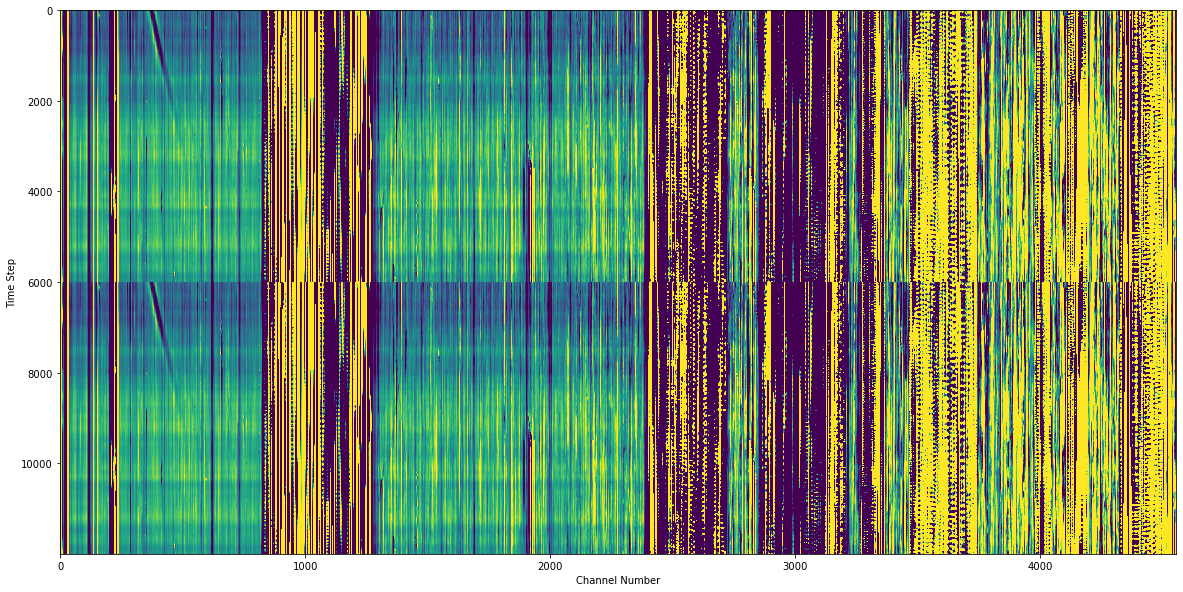

In [8]:
plt.subplots(figsize=(20,10))
plt.imshow(data,aspect='auto',vmin=-1,vmax=1)
plt.xlabel('Channel Number')
plt.ylabel('Time Step')
plt.show()

- Actual cable length is longer than routes
- Interpolation
- Apply correction factor

In [9]:
data.shape

(12000, 4556)

filtfilt vs SOS filt, look at np, obspy

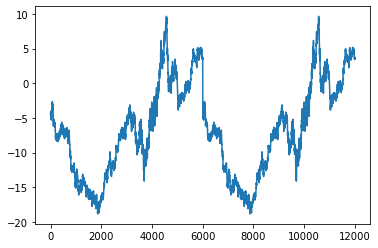

In [10]:
plt.plot(data[:,4555])

In [11]:
def plot_ft(i):
    ft=fftshift(fft(tukey(12000)*detrend(data[:,i])))
    plt.plot(f,np.abs(ft))
    plt.xlim(0,100)
    plt.yscale('log')

[[None, None], [None, None], [None, None]]


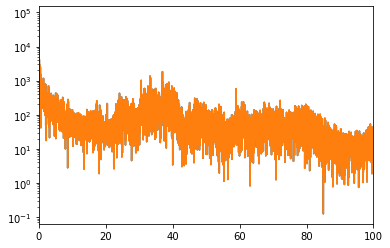

In [12]:
columns = 2
rows = 3
f=fftshift(fftfreq(12000,d=0.005))
a = []
b = []

for j in range(0, columns):
    b.append(plot_ft(3))
for i in range(0, rows):
    a.append(b)
    
print(a)

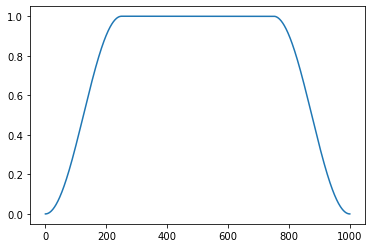

In [13]:
# tukey removes beginning & end of a signal (tapers the ends of a wave)

plt.plot(tukey(1000))

# make a matrix with one of these plots in each column

In [14]:
rows = 1
cols = data.shape[1]

x=[]


for i in range(cols):
    ft=fftshift(fft(tukey(12000)*detrend(data[:,i])))
    x.append(ft)

In [15]:
x=np.array(x)

(0.0, 100.0)

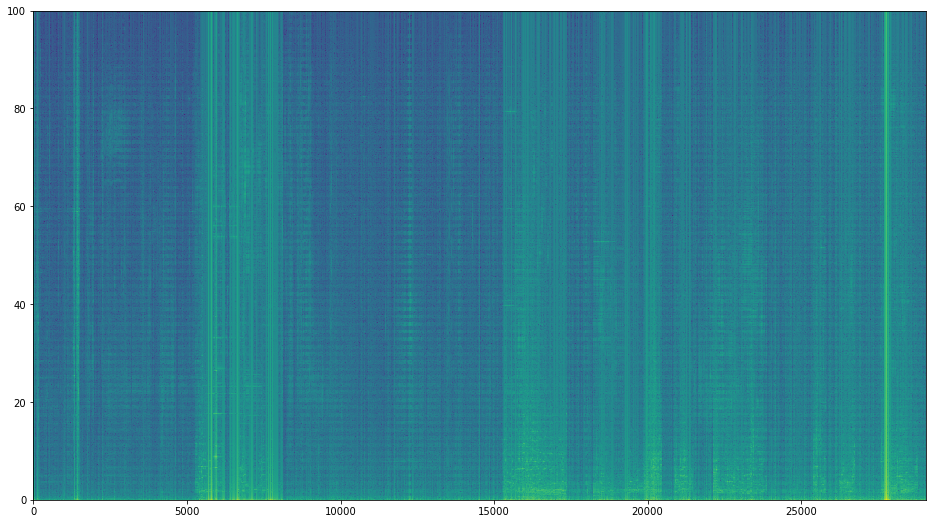

In [16]:
distance = np.arange(cols)*attrs['SpatialSamplingInterval']
plt.subplots(figsize=(16,9))
# plt.pcolormesh(distance[::20],f, np.log10(np.abs(x[::20,:])).T)
plt.pcolormesh(distance,f, np.log10(np.abs(x)).T)
plt.ylim([0,100])

In [17]:
x.shape

(4556, 12000)

### Analyzing feb data:
in drive: data/data3

In [18]:
import os

data3_dir = '/data/data3/seadasn_2022-10-07_2023-01-13/'

# List all files in the directory
files = os.listdir(data3_dir)

# Print the last 10 files
print(files[-10:])

['seadasn_2023-01-14_10-55-00_GMT.h5', 'seadasn_2023-01-14_10-21-00_GMT.h5', 'seadasn_2023-01-14_10-56-00_GMT.h5', 'seadasn_2023-01-14_10-22-00_GMT.h5', 'seadasn_2023-01-14_10-57-00_GMT.h5', 'seadasn_2023-01-14_10-23-00_GMT.h5', 'seadasn_2023-01-14_10-24-00_GMT.h5', 'seadasn_2023-01-14_10-59-00_GMT.h5', 'seadasn_2023-01-14_11-00-00_GMT.h5', 'seadasn_2023-01-14_11-01-00_GMT.h5']


In [19]:
filename = '/data/data3/seadasn_2022-10-07_2023-01-13/seadasn_2023-01-14_10-13-00_GMT.h5'
data_file = h5py.File(filename)
data=np.array(data_file['/Acquisition/Raw[0]/RawData'])
data_file.close()

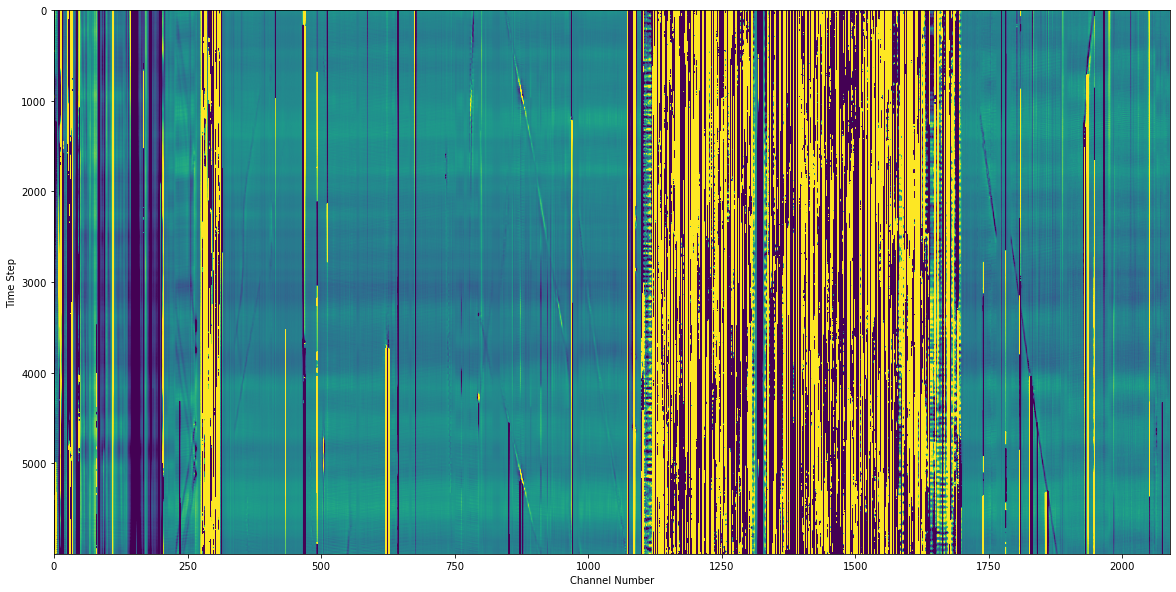

In [20]:
plt.subplots(figsize=(20,10))
plt.imshow(data,aspect='auto',vmin=-1,vmax=1)
plt.xlabel('Channel Number')
plt.ylabel('Time Step')
plt.show()